In [41]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd 
import matplotlib.pyplot as plt

X = pd.read_csv('./csv_result-1222.csv')
X.head()

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)



[9.99998236e-01 2.62540630e-07]
[3.35542475e+05 1.71927817e+02]


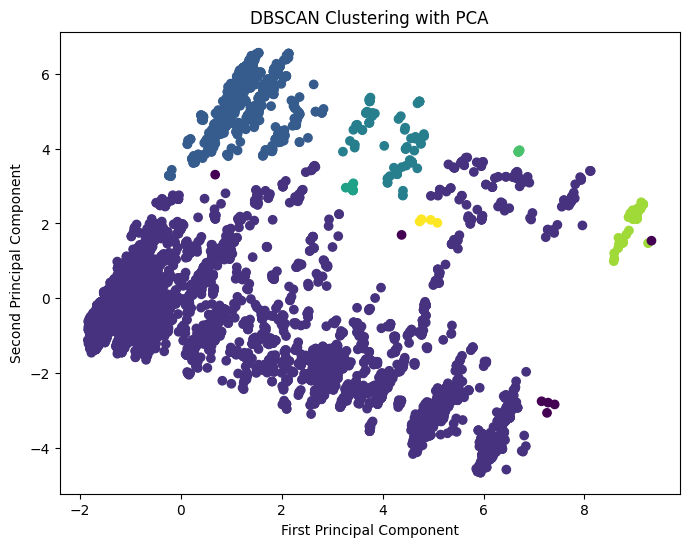

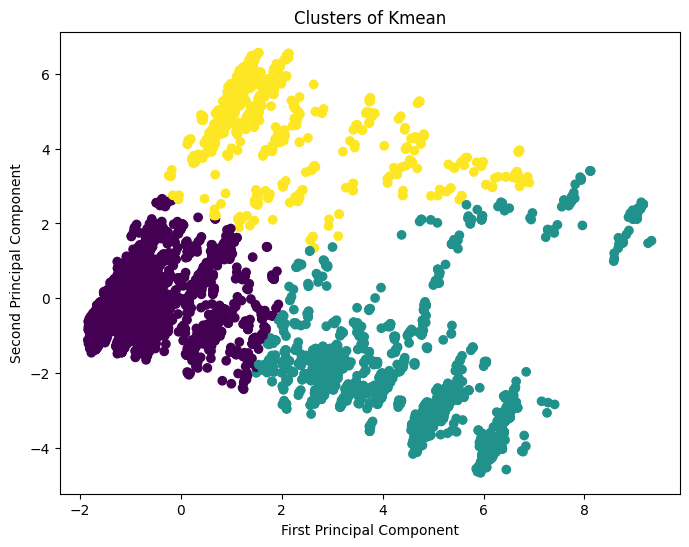

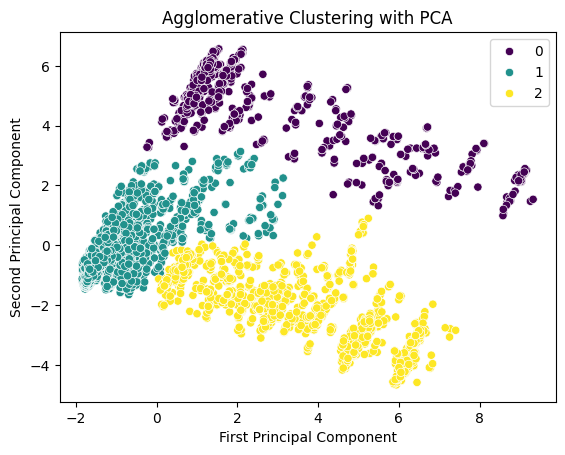

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


# Load your data into X
# For example:
# X = ...

# Preprocess the data (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

#Perform Agg
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(8,  6))
plt.scatter(X_pca[:,  0], X_pca[:,  1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Create a dataframe with PCA results and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8,  6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters of Kmean')
plt.show()

# Apply AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(X_pca)

# Visualize the clusters
sns.scatterplot(x=X_pca[:,  0], y=X_pca[:,  1], hue=clusters, palette='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Agglomerative Clustering with PCA')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11055 samples in 0.004s...
[t-SNE] Computed neighbors for 11055 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11055
[t-SNE] Computed conditional probabilities for sample 2000 / 11055
[t-SNE] Computed conditional probabilities for sample 3000 / 11055
[t-SNE] Computed conditional probabilities for sample 4000 / 11055
[t-SNE] Computed conditional probabilities for sample 5000 / 11055
[t-SNE] Computed conditional probabilities for sample 6000 / 11055
[t-SNE] Computed conditional probabilities for sample 7000 / 11055
[t-SNE] Computed conditional probabilities for sample 8000 / 11055
[t-SNE] Computed conditional probabilities for sample 9000 / 11055
[t-SNE] Computed conditional probabilities for sample 10000 / 11055
[t-SNE] Computed conditional probabilities for sample 11000 / 11055
[t-SNE] Computed conditional probabilities for sample 11055 / 11055
[t-SNE] Mean sigma: 1.655680
[t-SNE] KL divergenc

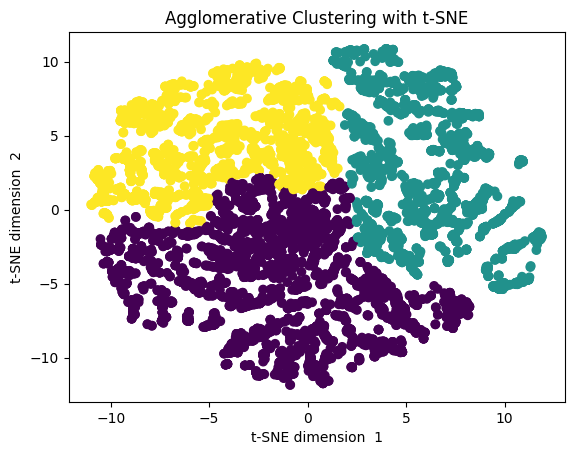

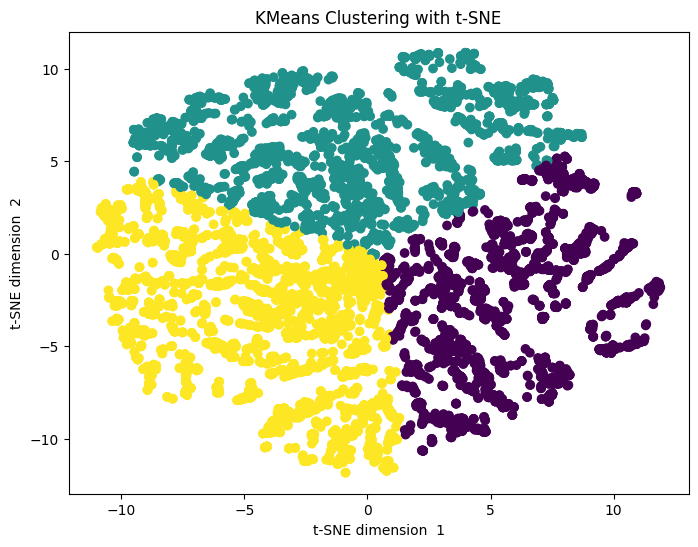

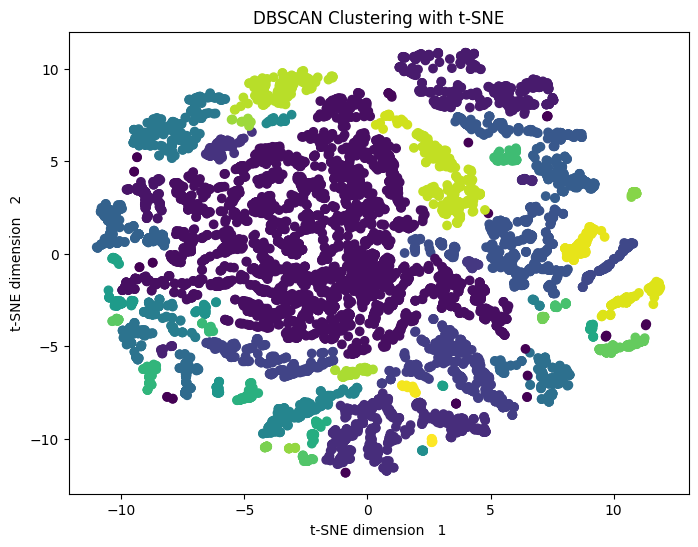

In [43]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Optional preprocessing: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Apply AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(X_tsne)

# Visualize the clusters
plt.scatter(X_tsne[:,  0], X_tsne[:,  1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE dimension  1')
plt.ylabel('t-SNE dimension  2')
plt.title('Agglomerative Clustering with t-SNE')
plt.show()



# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_tsne)

# Visualize the clusters
plt.figure(figsize=(8,  6))
plt.scatter(X_tsne[:,  0], X_tsne[:,  1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE dimension  1')
plt.ylabel('t-SNE dimension  2')
plt.title('KMeans Clustering with t-SNE')
plt.show()


# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# Assign a unique label to noise points (-1)
noise = np.where(clusters == -1)[0] 
labels = np.unique(clusters)
n_clusters = len(labels)

# Visualize the clusters
plt.figure(figsize=(8,   6))
plt.scatter(X_tsne[:,   0], X_tsne[:,   1], c=clusters, cmap='viridis')

# Color noise points in black
#plt.scatter(X_tsne[noise,   0], X_tsne[noise,   1], c='black', marker='+')

plt.xlabel('t-SNE dimension   1')
plt.ylabel('t-SNE dimension   2')
plt.title('DBSCAN Clustering with t-SNE')
plt.show()


In [44]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


/Users/fuhetienne/.pyenv/versions/3.11.6/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


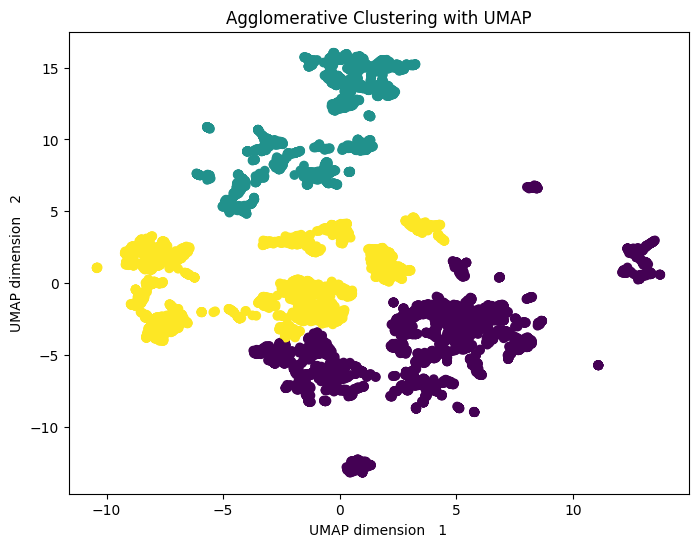

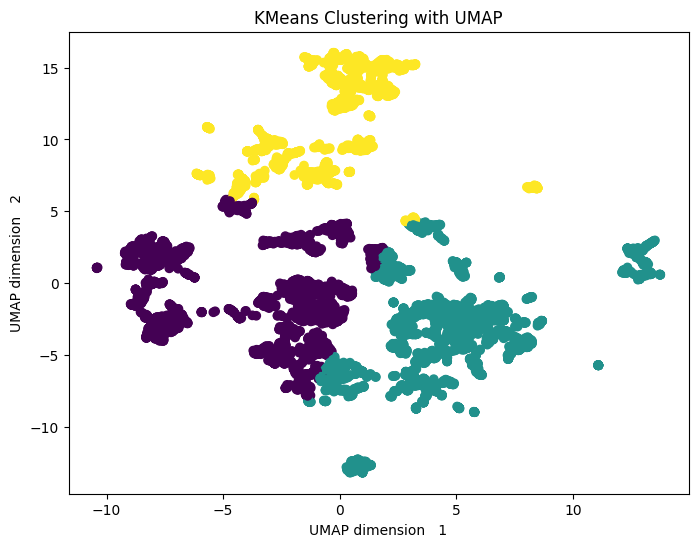

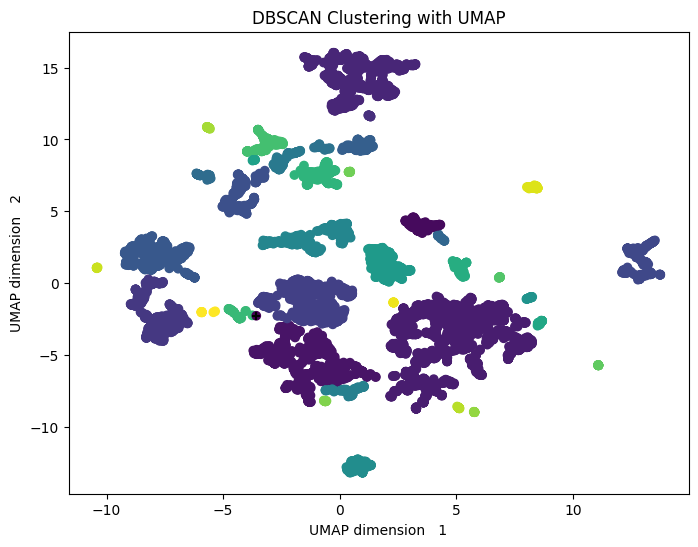

In [45]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Apply AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(embedding)

# Visualize the clusters
plt.figure(figsize=(8,   6))
plt.scatter(embedding[:,   0], embedding[:,   1], c=clusters, cmap='viridis')
plt.xlabel('UMAP dimension   1')
plt.ylabel('UMAP dimension   2')
plt.title('Agglomerative Clustering with UMAP')
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(embedding)

# Visualize the clusters
plt.figure(figsize=(8,   6))
plt.scatter(embedding[:,   0], embedding[:,   1], c=clusters, cmap='viridis')
plt.xlabel('UMAP dimension   1')
plt.ylabel('UMAP dimension   2')
plt.title('KMeans Clustering with UMAP')
plt.show()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(embedding)

# Assign a unique label to noise points (-1)
noise = np.where(clusters == -1)[0]
labels = np.unique(clusters)
n_clusters = len(labels)

# Visualize the clusters
plt.figure(figsize=(8,   6))
plt.scatter(embedding[:,   0], embedding[:,   1], c=clusters, cmap='viridis')

# Color noise points in black
plt.scatter(embedding[noise,   0], embedding[noise,   1], c='black', marker='+')

plt.xlabel('UMAP dimension   1')
plt.ylabel('UMAP dimension   2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

In [44]:
import requests

# Define the URL of the Shoutcast stream\\
# https://radio13.pro-fhi.net:19008/status-json.xsl
stream_url = 'https://radio.pro-fhi.net:19000/stream'

# Send a HEAD request to get only the headers
response = requests.head(stream_url, stream=True)

# Get the 'icy-metaint' header value, which tells us where in the stream the metadata starts
metadata_interval = response.headers

# Assuming 'response' is the result of a requests.get() or requests.head() call
headers = response.headers

print(response.headers)

# Iterate over the headers and print those that start with 'icy'
for key in headers:
    if key.lower().startswith('icy'):
        print(key, ':', headers[key])


# Now we need to read the stream body and parse the metadata
# Since we only did a HEAD request, we need to send another GET request to get the stream body
response = requests.get(stream_url, stream=True)

 

# # Read the stream body in chunks
# for chunk in response.iter_content(chunk_size=metadata_interval +  1):
#     # Each chunk contains metadata followed by audio data
#     # The metadata is a single byte indicating the size of the metadata
#     metadata_size = ord(chunk[:1]) *  16  # Multiply by  16 to get the size in bytes
#     if metadata_size >  0:
#         # Extract the metadata from the chunk
#         metadata = chunk[1:metadata_size+1].decode('utf-8').rstrip('\0')
#         # Print the extracted metadata
#         print('Metadata:', metadata)


{'Date': 'Fri, 09 Feb 2024 13:12:14 GMT', 'Server': 'Apache', 'icy-notice1': '<BR>This stream requires <a href="http://www.winamp.com">Winamp</a><BR>', 'icy-notice2': 'Shoutcast DNAS/posix(linux x64) v2.6.1.777<BR>', 'Accept-Ranges': 'none', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'no-cache,no-store,must-revalidate,max-age=0', 'icy-name': 'WebRadioLatinos 100% Caliente', 'icy-genre': 'Latinos et pop', 'icy-br': '128', 'icy-sr': '44100', 'icy-url': 'http://www.webradiolatinos.com', 'icy-pub': '1', 'content-type': 'audio/mpeg', 'X-Clacks-Overhead': 'GNU Terry Pratchett', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}
icy-notice1 : <BR>This stream requires <a href="http://www.winamp.com">Winamp</a><BR>
icy-notice2 : Shoutcast DNAS/posix(linux x64) v2.6.1.777<BR>
icy-name : WebRadioLatinos 100% Caliente
icy-genre : Latinos et pop
icy-br : 128
icy-sr : 44100
icy-url : http://www.webradiolatinos.com
icy-pub : 1


In [39]:
import http.client

conn = http.client.HTTPSConnection("radio13.pro-fhi.net", 19008)
payload = ''
headers = {}
conn.request("GET", "/status-json.xsl", payload, headers)
res = conn.getresponse()
data = res.read()
print(data.decode("utf-8"))

{"icestats":{"admin":"icemaster@localhost","host":"radio13.pro-fhi.net","location":"Earth","server_id":"Icecast 2.4.2","server_start":"Mon, 25 Sep 2023 05:47:30 +0200","server_start_iso8601":"2023-09-25T05:47:30+0200","source":{"bitrate":128,"genre":"funk,groove,hip hop,hold school,rnb,soul,rap","listener_peak":29,"listeners":6,"listenurl":"http://radio13.pro-fhi.net:9008/stream","server_description":"Exclusiv' Funk & Groove","server_name":"FunkaGroove","server_type":"audio/mpeg","server_url":"http://funkagroove.com","stream_start":"Wed, 31 Jan 2024 10:32:20 +0100","stream_start_iso8601":"2024-01-31T10:32:20+0100","title":"S.O.S Band - No One's Gonna Love You","dummy":null}}}
